In [128]:
import numpy as np
import os
import csv
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import skellam
import pandas as pd
import itertools
import matplotlib.pyplot as plot
%run -i utils.py

### Historical training

In [129]:
fixture_list_1 = import_fixture_list("../data/prem_results_20162017.csv")
fixture_list_2 = import_fixture_list("../data/prem_results_20172018.csv")
fixture_list_3 = import_fixture_list("../data/prem_results_20182019.csv")
fixture_list_4 = import_fixture_list("../data/prem_results_20192020.csv")

In [130]:
# all teams in three seasons and fourth season
team_list = np.concatenate((np.unique(fixture_list_1.as_matrix()[:, 0]),
                            np.unique(fixture_list_2.as_matrix()[:, 0]),
                            np.unique(fixture_list_3.as_matrix()[:, 0]),
                            np.unique(fixture_list_4.as_matrix()[:, 0])))

utils.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import os
utils.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import csv
utils.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from scipy.stats import poisson
utils.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from scipy.stats import norm


In [131]:
teams = np.unique(team_list)

In [132]:
n_train = 100

In [133]:
fl1 = fixture_list_1.as_matrix()
fl2 = fixture_list_2.as_matrix()
fl3 = fixture_list_3.as_matrix()
# stop this season at n_train games
fl4 = fixture_list_4.as_matrix()[:n_train, :]

utils.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import numpy as np
utils.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import os
utils.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import csv
utils.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from scipy.stats import norm


In [134]:
all_seasons = [fl1, fl2, fl3, fl4]

In [135]:
priormeans = np.ones((2 * len(teams)) + 2) * 0.0
priorsds = np.ones((2 * len(teams)) + 2) * 0.15
beta = 0.0008
niter = 3000
forgetting_factor = 0.999

est = EstimateParameters(all_seasons, teams, beta, priormeans, priorsds, niter=niter, forgetting_factor = forgetting_factor)

------
Iteration:  0
Home coefficient: 0.15382453819068395
Arsenal attack coefficient: 1.4442006657741617
acceptance ratio:  1.0
------
Iteration:  10
Home coefficient: 0.13400959006129576
Arsenal attack coefficient: 0.9937489524494376
acceptance ratio:  0.5454545454545454
------
Iteration:  20
Home coefficient: 0.18749229331951647
Arsenal attack coefficient: 0.7284168843379066
acceptance ratio:  0.42857142857142855
------
Iteration:  30
Home coefficient: 0.18905932393732883
Arsenal attack coefficient: 0.519431699106173
acceptance ratio:  0.3870967741935484
------
Iteration:  40
Home coefficient: 0.13540987407397204
Arsenal attack coefficient: 0.0773852963321018
acceptance ratio:  0.4146341463414634
------
Iteration:  50
Home coefficient: 0.1369229456541745
Arsenal attack coefficient: 0.22744939133591177
acceptance ratio:  0.39215686274509803
------
Iteration:  60
Home coefficient: 0.10489461412511612
Arsenal attack coefficient: 0.19082134440604398
acceptance ratio:  0.3934426229508196

KeyboardInterrupt: 

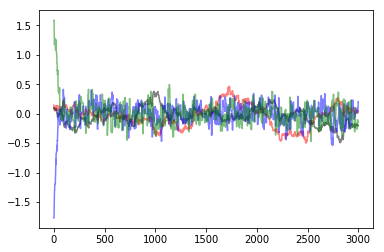

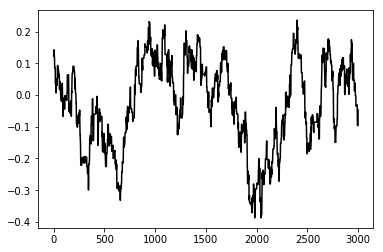

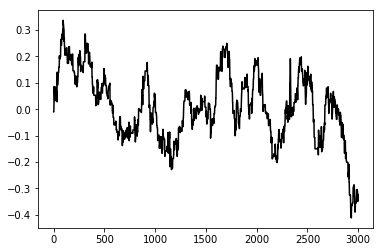

In [127]:
tm = 'Man City'
plot.plot(est[:, (2 + np.where(teams == tm)[0][0]).astype(int)], 'r', alpha=0.5)
plot.plot(est[:, (len(teams) + 2 + np.where(teams == tm)[0][0]).astype(int)], 'k', alpha=0.5)

tm = 'Arsenal'
plot.plot(est[:, (2 + np.where(teams == tm)[0][0]).astype(int)], 'b', alpha=0.5)
plot.plot(est[:, (len(teams) + 2 + np.where(teams == tm)[0][0]).astype(int)], 'g', alpha=0.5)
plot.show()

plot.plot(est[:, 0], 'k')
plot.show()

plot.plot(est[:, 1], 'k')
plot.show()

#### Save parameters

In [21]:
# save parameters
burn = int((1 * niter) / 5)
int_mean = np.array([np.mean(est[burn:, 0])])
int_sd = np.array([np.std(est[burn:, 0])])
mu_mean = np.array([np.mean(est[burn:, 1])])
mu_sd = np.array([np.std(est[burn:, 1])])
a_mean = np.mean(est[burn:, 2:(len(teams) + 2)], axis=0)
a_sd = np.std(est[burn:, 2:(len(teams) + 2)], axis=0)
d_mean = np.mean(est[burn:, (len(teams) + 2):((2 * len(teams)) + 2)], axis=0)
d_sd = np.std(est[burn:, (len(teams) + 2):((2 * len(teams)) + 2)], axis=0)
means = np.concatenate((int_mean, mu_mean, a_mean, d_mean))
sds = np.concatenate((int_sd, mu_sd, a_sd, d_sd))

sds[2 + inds] = 0.15
sds[2 + len(teams) + inds] = 0.15

with open('../parameters/all_teams.csv', mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    for tm in teams:
        csv_writer.writerow([tm])
csv_file.close()

with open('../parameters/all_teams_params.csv', mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    for i in range(((2 * len(teams)) + 2)):
        csv_writer.writerow([means[i], sds[i]])
csv_file.close()

[18  1 19]


In [17]:
sds[2:(len(teams)+2)]

array([0.09654224, 0.15      , 0.09089884, 0.11293029, 0.11041114,
       0.12420139, 0.09065041, 0.10942255, 0.10424359, 0.1296018 ,
       0.09722535, 0.13120417, 0.10129506, 0.09450708, 0.0955551 ,
       0.09183761, 0.12878411, 0.123929  , 0.15814863, 0.15      ,
       0.09898296, 0.10998366, 0.14003356, 0.1272919 , 0.08668595,
       0.10933727, 0.13501188, 0.10496069, 0.12435299])

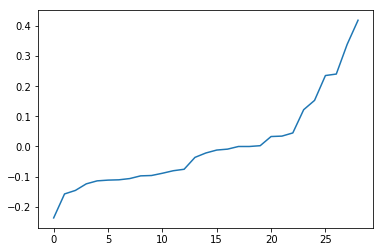

In [18]:
plot.plot(np.sort(means[2:(len(teams)+2)]))

### Evaluate parameters

In [ ]:
# define n_test period
n_test = np.shape(fl4)[0]

# test fixtures
test_fl4 = fl4[(n_train:n_test), :]

In [ ]:
# create simulation for each match
sims = pd.DataFrame({'Home Team': [], 'Away Team': [], 'Home': [], 'Draw': [], 'Away': []})
N = 10000
for i in range(np.shape(test_fl4)[0]):
    ht = test_fl4[i, 0]
    at = test_fl4[i, 1]
    ind_ht = np.where(teams == ht)[0].astype(int)
    ind_at = np.where(teams == at)[0].astype(int)
    lambda_ht = np.exp(np.random.normal(int_mean, int_sd, N) + np.random.normal(mu_mean, mu_sd, N) + np.random.normal(a_mean[ind_ht], a_sd[ind_ht], N) + np.random.normal(d_mean[ind_at], d_sd[ind_at], N))
    lambda_at = np.exp(np.random.normal(int_mean, int_sd, N) + np.random.normal(a_mean[ind_at], a_sd[ind_at], N) + np.random.normal(d_mean[ind_ht], d_sd[ind_ht], N))
    outs = np.zeros(N)
    for j in range(N):
        outs[j] = int(skellam.rvs(lambda_ht, lambda_at, size = 1))
    sims = sims.append({'Home Team': ht, 'Away Team': at, 'Home': np.mean(outs > 0), 'Draw': np.mean(outs == 0), 'Away': np.mean(outs < 0)}, ignore_index = True)


In [ ]:
# compute expected points vs actual
sims['Actual Home Points'] = ((test_fl4[:, 2] > test_fl4[:, 3]) * 3) + ((test_fl4[:, 2] == test_fl4[:, 3]) * 1)
sims['Actual Away Points'] = ((test_fl4[:, 2] < test_fl4[:, 3]) * 3) + ((test_fl4[:, 2] == test_fl4[:, 3]) * 1)

sims['Expected Home Points'] = (sims['Home'] * 3) + (sims['Draw'] * 1)
sims['Expected Away Points'] = (sims['Away'] * 3) + (sims['Draw'] * 1)

In [ ]:
# make overall simulation table
overall_sims = sims[['Home Team', 'Home Expected Points', 'Actual Home Points']].rename({'Home Team': 'Team', 'Home Expected Points': 'Expected', 'Actual Home Points': 'Actual'}).append(sims[['Away Team', 'Away Expected Points', 'Actual Away Points']].rename({'Away Team': 'Team', 'Away Expected Points': 'Expected', 'Actual Away Points': 'Actual'}), ignore_index = True)

In [ ]:
# summarise by club
team_points_comparison = overall_sims.group_by("Team").agg(sum(overall_sims['Expected']), sum(overall_sims['Actual']))